# HA 3

In [140]:
import math
import sympy
import hashlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from typing import List, Tuple
from random import randint, randrange

### Problem 1 (1 point)

Diffie–Hellman key exchange protocol is one of the earliest practical examples of public key exchange implemented within the field of cryptography. Published in 1976 by Diffie and Hellman, this is the earliest publicly known work that proposed the idea of a private key and a corresponding public key. 

1) Implement function to generate common secret key within multiplicative group of given Finite field with known generator. 

*Note. You can assume that all the numbers are small, for example, less than $2^{16}$.*

In [21]:
def diffie_hellman(p, g, first_key, second_key):
    first_secret_key = (g ** first_key) % p
    second_secret_key = (g ** second_key) % p
    
    common_secret_key = (first_secret_key ** second_key) % p

    return common_secret_key

2) Test your solution in GF(17) with generator g=11. Bobs' open key B=11, Alice private key is a=7

Bob's open key is equal to 11. $ B = g^b mod p \Rightarrow 11 = 11^b mod 17 \Rightarrow b = 1 $

In [59]:
p = 17
g = 11
B = 11
a = 7
b = 1
common_secret_key = diffie_hellman(p, g, a, b)
assert(common_secret_key == pow(B, a, p))

print(f'Common secret key: {common_secret_key}')

Common secret key: 3


### Problem 2 (3 points)

El Gamal protocol is widely used in cryptography. In this task we will ask you to implement your own El-Gamal encryption scheme on Python.

1) Implement function for generating keys. The function must generate big random prime number (problem of generating big prime numbers was discussed within the lectures). (1 point)

*Note. You can assume that all the numbers are small, for example, less than $2^{32}$. But you **must** use a primality test as a part of the function to get a full score.*

In [194]:
def generate_big_prime():
    num = random.randint(2**31, 2**32)
    while not is_prime(num):
        num = random.randint(2**31, 2**32)
    return num

In [195]:
def is_prime(num):
    if num <= 1:
        return False
    if num <= 3:
        return True
    if num % 2 == 0 or num % 3 == 0:
        return False
    i = 5
    while i * i <= num:
        if num % i == 0 or num % (i + 2) == 0:
            return False
        i += 6
    return True

In [196]:
def generate_keys():
    p = generate_big_prime()
    g = randrange(1, p)
    x = randrange(2, p - 1)
    y = pow(g, x, p)
        
    return p, g, x, y

2) Implement functions that realize the encryption and decryption in El Gamal protocol. (1 points)

In [197]:
def encrypt(message):
    p, g, x, y = generate_keys()
    if message >= p:
        print(f'Message should be smaller than {p}')
        return
        
    k = random.randrange(2, p-1)
    
    a = pow(g, k, p)
    b = (pow(y, k, p) * message) % p
    
    return a, b, p, x

In [198]:
def decrypt(a, b, p, x):
    return (b * pow(a, p - 1 - x, p)) % p

3) Calculate Hash of your name by SHA-1 and test El Gamal encryption/decryption functions on its 16-bit prefix. (1 points)

In [199]:
name_hash = int(hashlib.sha1('Anastasiya Nasykhova'.encode('utf-8')).hexdigest(), 16) & 0xFFFF

In [200]:
a, b, p, x = encrypt(name_hash)
decrypted_hash = decrypt(a, b, p, x)

In [201]:
print(f'Name hash: {name_hash}')
print(f'Decrypted hash: {decrypted_hash}')

Name hash: 60079
Decrypted hash: 60079


### Problem 3 (4 points)

Elliptic curves due to their efficient hardware realization widely used in modern secure communication channels. The main thing that lies inside their cryptographic hardness is that we can break them only by greed search over all group points. In this task, we will ask you to write Python function that returns all group elements of a certain elliptic curve over a finite field 

1) Write a python function that list all points of elliptic curve $y^2=x^3+7$ over $F_{127}$ (1 point)

*Note. $127 = 2^7-1$ is the fourth Mersenne prime.*

In [62]:
def elliptic_curve_points(p):
    points = []
    for x in range(p):
        for y in range(p): 
            if (y ** 2 - x ** 3 - 7) % p == 0:
                points.append((x, y))
    return points

In [72]:
prime_field = 127
points_on_curve = elliptic_curve_points(prime_field)
print(f'Total count of points: {len(points_on_curve)}')
print('Points on the elliptic curve:')
points_dataframe = pd.DataFrame(points_on_curve, columns =['x', 'y'])
print(points_dataframe)

Total count of points: 126
Points on the elliptic curve:
       x    y
0      1   32
1      1   95
2      2   53
3      2   74
4      3   62
..   ...  ...
121  122  124
122  123   18
123  123  109
124  124   19
125  124  108

[126 rows x 2 columns]


2) Compare the number of points with Hasse’s estimate $|N-(q+1)|\leq 2{\sqrt  {q}}$. (1 point)

In [78]:
total_count = len(points_on_curve)

assert(abs(total_count - (prime_field + 1)) <= 2 * prime_field ** 0.5)
print('Assertion passed!')

Assertion passed!


3) Prove that the point
$A = (19, 32)$ belongs to the elliptic curve and construct a sequence of $B_n = nA, n = 1, ..., 100$. (2 points)

In [115]:
def is_point_on_curve(x, y, p):
    return (y ** 2 - x ** 3 - 7) % p == 0

In [104]:
A = (19, 32)
assert is_point_on_curve(A[0], A[1], prime_field)
print('Assertion passed!')

Assertion passed!


$x = 19, y = 32$

$ (32)^2 = (19)^3 + 7 $ (mod 127)

Left: $ 1024 = 8 \cdot 127 + 8 = 8 $ (mod 127)

Right: $ 6859 + 7 = 6866 = 54 \cdot 127 + 8 = 8 $ (mod 127)

$ 8 = 8 $ (mod 127)

In [126]:
def point_addition(p, x, y):
    if x == A[0] and y == A[1]:
        m = (3 * x ** 2) * pow(2 * y, -1, p) % p
    else:
        m = (A[1] - y) * pow(A[0] - x, -1, p) % p
        
    new_x = (m ** 2 - x - A[0]) % p
    new_y = (m * (x - new_x) - y) % p
    return (new_x, new_y)

In [127]:
B_sequence = [A]
for n in range(2, 101):
    B_n = point_addition(prime_field, B_sequence[-1][0], B_sequence[-1][1])
    assert(is_point_on_curve(B_n[0], B_n[1], prime_field))
    B_sequence.append(B_n)

print('Sequence of B_n = nA for n = 1, ..., 100:')
for i in range(len(B_sequence)):
    print(f'{i + 1}:\t{B_sequence[i]}')

Sequence of B_n = nA for n = 1, ..., 100:
1:	(19, 32)
2:	(11, 24)
3:	(98, 16)
4:	(123, 18)
5:	(79, 64)
6:	(110, 38)
7:	(58, 38)
8:	(38, 53)
9:	(67, 62)
10:	(91, 50)
11:	(25, 30)
12:	(69, 27)
13:	(86, 89)
14:	(41, 27)
15:	(103, 91)
16:	(122, 3)
17:	(60, 19)
18:	(24, 78)
19:	(1, 32)
20:	(107, 95)
21:	(75, 78)
22:	(109, 12)
23:	(21, 39)
24:	(4, 84)
25:	(2, 53)
26:	(17, 100)
27:	(104, 64)
28:	(76, 84)
29:	(96, 76)
30:	(116, 94)
31:	(99, 91)
32:	(71, 63)
33:	(87, 74)
34:	(94, 30)
35:	(45, 94)
36:	(101, 46)
37:	(106, 12)
38:	(34, 24)
39:	(28, 49)
40:	(82, 103)
41:	(124, 19)
42:	(14, 46)
43:	(112, 76)
44:	(57, 62)
45:	(8, 97)
46:	(52, 36)
47:	(51, 18)
48:	(18, 39)
49:	(12, 46)
50:	(100, 3)
51:	(80, 109)
52:	(47, 43)
53:	(3, 65)
54:	(78, 50)
55:	(46, 76)
56:	(88, 39)
57:	(72, 16)
58:	(70, 108)
59:	(39, 115)
60:	(84, 111)
61:	(32, 3)
62:	(93, 94)
63:	(85, 50)
64:	(85, 77)
65:	(93, 33)
66:	(32, 124)
67:	(84, 16)
68:	(39, 12)
69:	(70, 19)
70:	(72, 111)
71:	(88, 88)
72:	(46, 51)
73:	(78, 77)
74:	(

### Problem 4 (2 points)

Let $p = 601$, $q = 7$, $e = 1463$ be the setup of the RSA algorithm. Compute $d$, sign the plane message $m = 58$ and check the signature.

In [46]:
def get_phi(p, q):
    return (p - 1) * (q - 1)

In [52]:
def get_rsa_keys(p, q, e, M):
    n = p * q
    phi = get_phi(p, q)
    
    d = pow(e, -1, phi)
    
    public_key = n, e
    private_key = n, d   
    
    return public_key, private_key

In [53]:
p = 601
q = 7
e = 1463
m = 58

In [54]:
public_key, private_key = get_rsa_keys(p, q, e, m)

print(f'Computed d: {private_key[1]}')

Computed d: 1127


In [55]:
encrypted_message = pow(m, public_key[1], public_key[0]) 

print(f"Signature s: {encrypted_message}")

Signature s: 2937


In [56]:
decrypted_message = pow(encrypted_message, private_key[1], private_key[0]) 
assert(M == decrypted_message)
print(f'Assertion passed! Decrypted message: {decrypted_message}')

Assertion passed! Decrypted message: 58


### Problem 5 (4* points)

*bonus problem

Consider an elliptic curve $y^2 = x^3 - 2 x - 1$.

In [260]:
def elliptic_curve_points(p):
    points = []
    for x in range(p):
        for y in range(p): 
            if (y ** 2 - x ** 3 + 2 * x - 1) % p == 0:
                points.append((x, y))
    return points

1) (1 point) Plot the curve for $(x, y) \in (-19, 19)$. Plot $$\{(x \mod 19, y \mod 19) \; | \;  (x, y) \in (-19 k, 19 k)^2 \; and \; y^2 = x^3 - 2 x - 1\}$$ for $k = 1, \dots, 5$. 

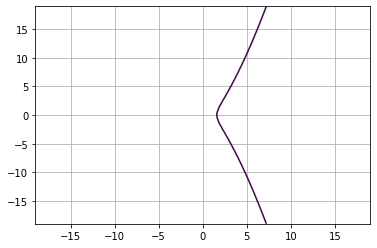

In [239]:
y, x = np.ogrid[-19:19:100j, -19:19:100j]
plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) + 2 * x  + 1, [0])
plt.grid()
plt.show()

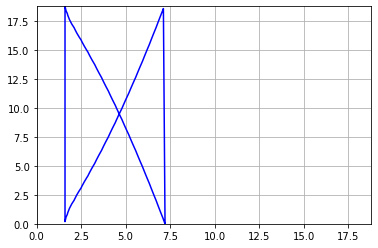

In [256]:
plt.figure()
k = 1
y, x = np.ogrid[(-19 * k):(19 * k):100j, (-19 * k):(19 * k):100j]
plt.contour((x % 19).ravel(), (y % 19).ravel(), pow(y, 2) - pow(x, 3) + 2 * x  + 1, [0], colors='b')
plt.grid()
plt.show()

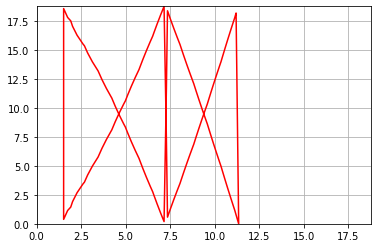

In [241]:
plt.figure()
k = 2
y, x = np.ogrid[(-19 * k):(19 * k):100j, (-19 * k):(19 * k):100j]
plt.contour((x % 19).ravel(), (y % 19).ravel(), pow(y, 2) - pow(x, 3) + 2 * x  + 1, [0], colors='r')
plt.grid()
plt.show()

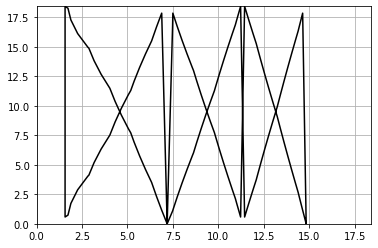

In [252]:
plt.figure()
k = 3
y, x = np.ogrid[(-19 * k):(19 * k):100j, (-19 * k):(19 * k):100j]
plt.contour((x % 19).ravel(), (y % 19).ravel(), pow(y, 2) - pow(x, 3) + 2 * x  + 1, [0], colors='k')
plt.grid()
plt.show()

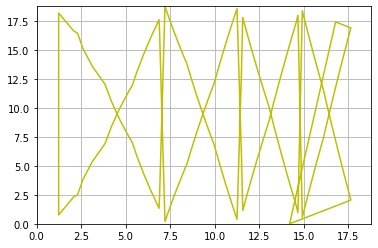

In [253]:
plt.figure()
k = 4
y, x = np.ogrid[(-19 * k):(19 * k):100j, (-19 * k):(19 * k):100j]
plt.contour((x % 19).ravel(), (y % 19).ravel(), pow(y, 2) - pow(x, 3) + 2 * x  + 1, [0], colors='y')
plt.grid()
plt.show()

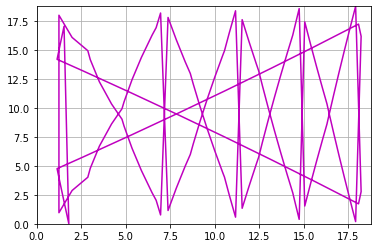

In [251]:
plt.figure()
k = 5
y, x = np.ogrid[(-19 * k):(19 * k):100j, (-19 * k):(19 * k):100j]
plt.contour((x % 19).ravel(), (y % 19).ravel(), pow(y, 2) - pow(x, 3) + 2 * x  + 1, [0], colors='m')
plt.grid()
plt.show()

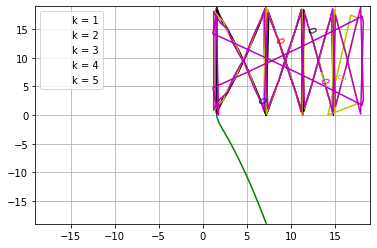

In [250]:
plt.figure()
y, x = np.ogrid[-19:19:100j, -19:19:100j]
plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) + 2 * x  + 1, [0], colors='g')
color = ['1', 'b', 'r', 'k', 'y', 'm']
for k in range(1, 6):
    y, x = np.ogrid[(-19 * k):(19 * k):100j, (-19 * k):(19 * k):100j]
    line = plt.contour((x % 19).ravel(), (y % 19).ravel(), pow(y, 2) - pow(x, 3) + 2 * x  + 1, [0], colors=color[k])
    plt.clabel(line, inline=1, fontsize=10)
    line.collections[0].set_label(f'k = {k}')

plt.grid()
plt.legend(loc='upper left')
plt.show()

2) (1 point) Scatter all the integer points of curve $y^2 = x^3 - 2 x - 1$ $\mod 19$. How many points are not in $$\{(x \mod 19, y \mod 19) \; | \;  (x, y) \in (-19 \cdot 5, 19  \cdot 5)^2 \; and \; y^2 = x^3 - 2 x - 1\}?$$ 

3) (2 points) Choose integer examples for all three elliptic curve $y^2 = x^3 - 2 x - 1$ (over real numbers, not over a finite field) addition cases and illustrate them with (straight) lines.